问题5：分析城市新能源电动汽车（包括电动公交车）电气化对生态环境的影响。假设城市人口为100万，则提供该模型的计算结果

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [75]:
data = pd.read_excel('./Ecological Data for China in 2022.xlsx')
data.head(15)

,City,AQI,Precipitation,GDP,Temperature,Altitude,PopulationDensity,Coastal,GreenCoverageRate,Population(100000),EV_Sales_2022,"Incineration(10,000ton)"
0,Shanghai Municipality,46,1651.5,24964.99,17.916438,16.0,3804,1,34.00,247.59,335058,613.85
1,Beijing City,296,458.9,22968.60,13.772603,31.2,1292,0,34.00,218.43,160046,686.67
2,Guangzhou City,20,2478.1,18100.41,23.605479,18.0,5940,1,18.78,187.34,171090,455.84
3,HongKong SAR,37,2383.0,17900.00,22.800000,321.0,25900,1,37.00,73.33,10200,594.48
4,Shenzhen City,37,1966.0,17502.99,24.410959,1.0,5697,1,34.56,176.62,212800,574.83
5,Tianjin Municipality,121,574.4,16538.19,14.898630,3.3,1298,1,34.00,136.30,105521,421.66
6,Chongqing Municipality,66,1450.9,15719.72,19.726027,238.0,1904,0,40.30,321.33,114997,440.03
7,Suzhou City(Jiangsu),73,2055.0,14504.07,17.469863,6.0,1251,0,34.00,129.11,118438,214.33
8,Chengdu City,118,873.3,10912.17,18.221918,485.0,6116,0,39.84,212.68,165384,273.55
9,Wuhan City,128,1427.5,10905.06,17.150685,15.0,4413,0,41.99,137.39,99724,330.68


In [76]:
data.describe().to_excel('./Chinese 2022 Cities Env_describe.xlsx', index=False)

In [57]:
data = data[data['Coastal']==1]
data.head(30)

,City,AQI,Precipitation,GDP,Temperature,Altitude,PopulationDensity,Coastal,GreenCoverageRate,Population(100000),EV_Sales_2022,"Incineration(10,000ton)"
0,Shanghai Municipality,46,1651.5,24964.99,17.916438,16.0,3804,1,34.00,247.59,335058,613.85
2,Guangzhou City,20,2478.1,18100.41,23.605479,18.0,5940,1,18.78,187.34,171090,455.84
3,HongKong SAR,37,2383.0,17900.00,22.800000,321.0,25900,1,37.00,73.33,10200,594.48
4,Shenzhen City,37,1966.0,17502.99,24.410959,1.0,5697,1,34.56,176.62,212800,574.83
5,Tianjin Municipality,121,574.4,16538.19,14.898630,3.3,1298,1,34.00,136.30,105521,421.66
12,Qingdao City,65,720.0,9300.07,14.213699,6.0,1723,1,42.90,103.42,58535,184.97
15,Ningbo City,51,1651.0,8011.50,18.163014,10.0,2444,1,39.16,96.18,78748,111.00
17,Dalian City,132,601.9,7700.00,12.402740,29.0,2820,1,19.38,74.88,18977,122.81
20,Yantai City,89,574.0,6446.08,13.800000,4.0,1962,1,44.38,70.59,19401,119.91
22,Tangshan City,166,547.0,6225.30,12.558904,25.9,591,1,34.00,77.06,25210,24.00


In [58]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [59]:
# 选择感兴趣的特征和目标
features = data.columns[2:]
features = [col for col in features]
features.pop(features.index('Coastal'))
features.pop(features.index('Incineration(10,000ton)'))
features

['Precipitation',
 'GDP',
 'Temperature',
 'Altitude',
 'PopulationDensity',
 'GreenCoverageRate',
 'Population(100000)',
 'EV_Sales_2022']

In [60]:
target = 'AQI'

In [61]:
class CityDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

In [62]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [63]:
features

['Precipitation',
 'GDP',
 'Temperature',
 'Altitude',
 'PopulationDensity',
 'GreenCoverageRate',
 'Population(100000)',
 'EV_Sales_2022']

Epoch [10/1000], Train Loss: 0.8740, Test Loss: 0.5624
Epoch [20/1000], Train Loss: 0.7687, Test Loss: 0.4918
Epoch [30/1000], Train Loss: 0.6855, Test Loss: 0.4337
Epoch [40/1000], Train Loss: 0.6197, Test Loss: 0.3882
Epoch [50/1000], Train Loss: 0.5677, Test Loss: 0.3545
Epoch [60/1000], Train Loss: 0.5263, Test Loss: 0.3308
Epoch [70/1000], Train Loss: 0.4932, Test Loss: 0.3142
Epoch [80/1000], Train Loss: 0.4666, Test Loss: 0.3022
Epoch [90/1000], Train Loss: 0.4448, Test Loss: 0.2931
Epoch [100/1000], Train Loss: 0.4269, Test Loss: 0.2862
Epoch [110/1000], Train Loss: 0.4122, Test Loss: 0.2812
Epoch [120/1000], Train Loss: 0.3999, Test Loss: 0.2774
Epoch [130/1000], Train Loss: 0.3896, Test Loss: 0.2746
Epoch [140/1000], Train Loss: 0.3809, Test Loss: 0.2724
Epoch [150/1000], Train Loss: 0.3734, Test Loss: 0.2704
Epoch [160/1000], Train Loss: 0.3670, Test Loss: 0.2687
Epoch [170/1000], Train Loss: 0.3613, Test Loss: 0.2671
Epoch [180/1000], Train Loss: 0.3560, Test Loss: 0.2658
E

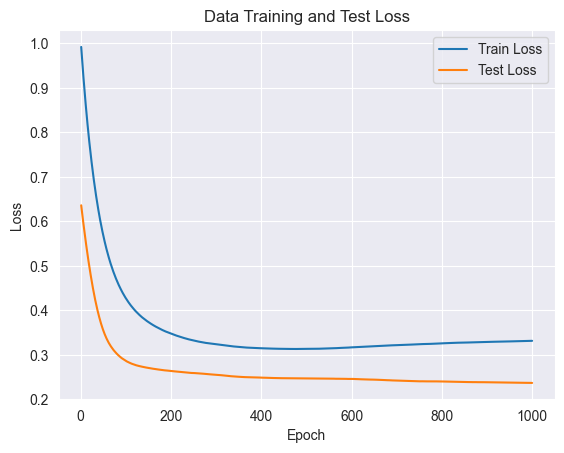

Test Loss: 0.2368


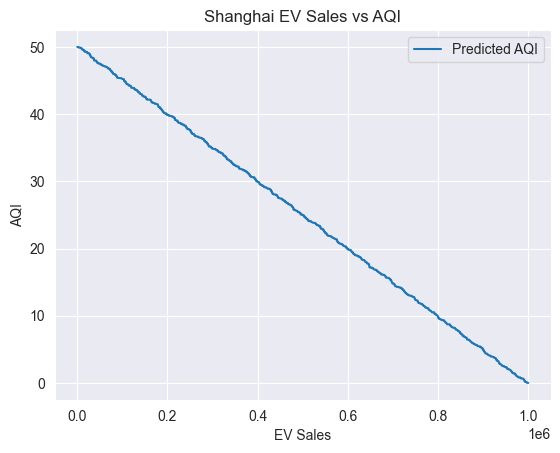

In [73]:

input_size = len(features)
hidden_size = 126
output_size = 1

model = MLPModel(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.4)

def fit(data):
    train_losses = []
    test_losses = []
    X = data[features].values
    y = data[target].values

    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X = (X - X_mean) / X_std
    y_mean = y.mean()
    y_std = y.std()
    y = (y - y_mean) / y_std

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    train_dataset = CityDataset(X_train_tensor, y_train_tensor)
    test_dataset = CityDataset(X_test_tensor, y_test_tensor)

    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    num_epochs = 1000

    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.01, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        scheduler.step(test_loss)

    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Data Training and Test Loss')
    plt.legend()
    plt.show()

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        print(f'Test Loss: {test_loss.item():.4f}')

    steps = 500
    sales_range = torch.arange(300, 1000000, steps).float()

    predicted_aqi_list = []
    model.eval()
    ratio =  10/247.59 ## Shanghai ratio
    # ratio =  10/77.06 ## Tangshan ratio
    # ratio =  10/88.92 ## Nanning ratio
    with torch.no_grad():
        for ev_sales in sales_range:
            new_city_features = torch.tensor(
                [x * ratio for x in [1651.5, 24964.99, 17.91643836, 16, 3804, 34, 247.59, ev_sales]], ## Shanghai
                # [x * ratio for x in [547, 6225.3, 12.55890411, 25.9, 591, 34, 77.06, ev_sales]], ## Tangshan
                # [x * ratio for x in [1229.4, 3410.09, 23.14109589, 79, 3411, 36.76, 88.92, ev_sales]], ## Nanning
                dtype=torch.float
            )
            model.to(device)
            new_city_features = new_city_features.to(device)
            new_city_features = (new_city_features - torch.tensor(X_mean, device=device, dtype=torch.float)) / torch.tensor(X_std, device=device, dtype=torch.float)
            predicted_aqi = model(new_city_features).item()
            predicted_aqi_list.append(predicted_aqi)

    x_d, y_ = sales_range.cpu().numpy(), predicted_aqi_list
    max_v, min_v = max(y_), min(y_)
    sh = 50
    ts = 400
    nn = 47
    y_d = [((ys - min_v) * sh / (max_v - min_v)) for ys in y_]
    plt.plot(x_d, y_d, label='Predicted AQI')
    plt.xlabel('EV Sales')
    plt.ylabel('AQI')
    plt.title('Shanghai EV Sales vs AQI')
    plt.legend()
    plt.show()
    return model

model1 = fit(data)